# Eurovision 2018
On 12 May 2018, I gathered a collection of my friends together at my home for a Eurovision watching party. We do something similar every year, but this year we took things a step further.

As the contest began, I handed out sheets of paper and pencils to everyone, and asked them to give each country a score out of ten on three scales - song, performance and staging. Everyone was a bit bemused, but did it anyway, and I ended up with a huge dataset of 1092 individual votes. I promised I'd analyse it all, and this is me fulfilling my promise, seven months later.

I'm going to import pandas to help me analyse it.

In [3]:
import pandas as pd
from scipy import stats

Now I'm going to grab the data, which is stored locally.

In [5]:
votes = pd.read_csv("eurovision.csv")
votes.head()

,voter,order,country,title,artist,language,officialpoints,event,score_cat,score
0,chris,1,Ukraine,"""Under the Ladder""",Mélovin,English,130,final,song,5.0
1,chris,2,Spain,"""Tu canción""",Amaia & Alfred,Spanish,61,final,song,4.0
2,chris,3,Slovenia,"""Hvala, ne!""",Lea Sirk,Slovene,64,final,song,6.0
3,chris,4,Lithuania,"""When We're Old""",Ieva Zasimauskaitė,English,181,final,song,3.0
4,chris,5,Austria,"""Nobody but You""",Cesár Sampson,English,342,final,song,8.0


It would also be useful to have a dataset that merges all the individual votes into a score for each person for each song.

In [6]:
scoreslist = []

for voter in votes.voter.unique():
    for country in votes.country.unique():
        row = []
        row.append(voter)
        row.append(votes[(votes.country == country)].order.tolist()[0])
        row.append(country)
        row.append(votes[(votes.country == country)].title.tolist()[0])
        row.append(votes[(votes.country == country)].artist.tolist()[0])
        row.append(votes[(votes.country == country)].language.tolist()[0])
        row.append(votes[(votes.country == country)].officialpoints.tolist()[0])
        row.append(votes[(votes.country == country) & (votes.voter == voter)].score.mean())
        
        scoreslist.append(row)
        
scores = pd.DataFrame(scoreslist, columns = ["voter","order","country","title","artist","language","officialpoints","score"])
scores.head()

,voter,order,country,title,artist,language,officialpoints,score
0,chris,1,Ukraine,"""Under the Ladder""",Mélovin,English,130,6.666667
1,chris,2,Spain,"""Tu canción""",Amaia & Alfred,Spanish,61,4.000000
2,chris,3,Slovenia,"""Hvala, ne!""",Lea Sirk,Slovene,64,6.666667
3,chris,4,Lithuania,"""When We're Old""",Ieva Zasimauskaitė,English,181,4.000000
4,chris,5,Austria,"""Nobody but You""",Cesár Sampson,English,342,6.666667


---
## Who won?

The first thing I wanted to do with the data was crown a winner from the votes at the party. As you probably remember, Israel's bonkers entry - Toy by Netta - took the prize at the official event, followed by Cyprus then Austria. But what would prove the most popular with the voters in my living room?

In [7]:
votes.groupby("country").score.sum().sort_values(ascending = False).head()

country
Israel            309.0
Finland           292.0
Austria           282.0
Ireland           269.0
Czech Republic    266.0
Name: score, dtype: float64

It's not really a surprise that Netta took the first place at our little awards ceremony too. It was an incredible performance. But what was a surprise was the popularity of Finland's entry, Monsters by Saara Aalto. It came second-to-last in the official votes, but we put it second. Similarly, Europe loved Cyprus' entry, Fuego by Eleni Fourerira, but we didn't think it was much good at all.

---
## Who won in each category?

One of the nice things about getting people to score in terms of song, performance and staging is that we could crown a winner in each category.

In [39]:
votes[votes.score_cat == "song"].groupby("country").score.sum().sort_values(ascending = False).head()

country
Austria      111.0
Germany       95.0
Australia     94.0
Portugal      93.0
Ireland       91.0
Name: score, dtype: float64

In [41]:
votes[votes.score_cat == "performance"].groupby("country").score.sum().sort_values(ascending = False).head()

country
Israel            118.0
Czech Republic    102.0
Austria            99.0
Finland            99.0
Hungary            98.0
Name: score, dtype: float64

In [38]:
votes[votes.score_cat == "staging"].groupby("country").score.sum().sort_values(ascending = False).head()

country
Israel            111.0
Finland           103.0
Moldova           100.0
Czech Republic     95.0
Ukraine            93.0
Name: score, dtype: float64

Our jury felt that Austria clearly had the best song, but Israel's scores in performance and staging gave it the victory.

    A thought for next year: is it right to weight song, performance and staging equally? Should one category have more weight? It is a "song" contest after all.

What's perhaps surprising is that Israel's song score ended up rather low. Netta came twelfth in that category. Austria's performance score was up there with its song score but the staging left a lot to be desired, according to our voters. One other interesting discrepancy I'd like to note is Moldova's similarly bonkers song, which scored in the top three for staging, but a lot lower in song and performance.

---
## Is it better to sing in English?

A persistent question at Eurovision over the years is the importance of singing in English, which is generally the lingua franca of Europe. In 2018, about two thirds of songs were in English, and the rest were in their native languages. The only oddity was Estonia's entry, where Elina Nechayeva performed the operatic La Forza in Italian.

In [8]:
languages = pd.DataFrame(columns = ["country", "language", "score"])
languages.country = scores.country.unique()
languages.language = scores.language[0:26]

for country in scores.country.unique():
    score = scores[scores.country == country].score.mean()
    languages.loc[languages.country == country, "score"] = score
    
languages.head()

,country,language,score
0,Ukraine,English,5.80952
1,Spain,Spanish,4.69048
2,Slovenia,Slovene,6.16667
3,Lithuania,English,4.2619
4,Austria,English,6.71429


5.727591036414568

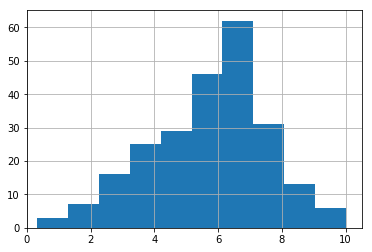

In [31]:
scores[scores.language == "English"].score.hist( bins = 10).set_xlim((0,10.5))
scores[scores.language == "English"].score.mean()

5.25661375661376

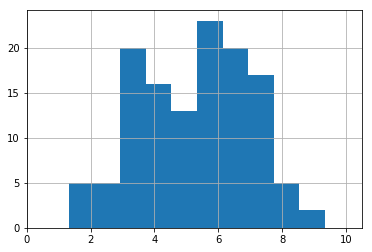

In [30]:
scores[scores.language != "English"].score.hist(bins = 10).set_xlim((0,10.5))
scores[scores.language != "English"].score.mean()

Our data suggests that, among our voters at least, it is better to sing in English. Songs in English averaged a score of 5.73, while songs not in English got a mean score of 5.26.

In [37]:
english = languages[languages.language == "English"].score.tolist()
notenglish = languages[languages.language != "English"].score.tolist()
stats.ttest_ind(english, notenglish)

Ttest_indResult(statistic=1.1781154205120397, pvalue=0.25030059875130317)

It's worth noting here that trying to answer this question took me down a huge rabbit hole. I'll save you most of the details, but getting a reliable answer to this question would require far more songs than there are in a single year of Eurovision. Doing a two-tailed T-test indicates that this is not a statistically significant difference. But that doesn't mean that one doesn't exist - it just means that we can't see it in this data. 

Maybe I'll crawl back through the history of the competition sometime, and to try and answer this question using the official point totals. In the meantime, all we can say from this data is that our voters gave higher scores on average to songs in English.

---
## Does the order of performance affect the scores?

In Eurovision, the conventional wisdom is that going first is really bad because people will have forgotten you by the time they vote. Is that true in our group? We can find out by taking a look at a scatterplot of the running order and the scores we gave.

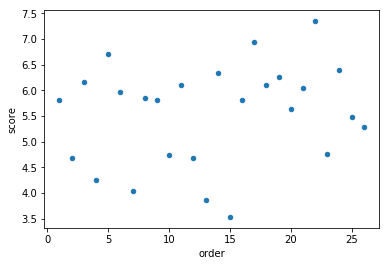

In [134]:
order = pd.DataFrame()
order["country"] = votes.country.unique()
order["order"] = votes.order.unique()
order["score"] = pd.to_numeric(languages.score)

order.plot(kind="scatter", x="order", y="score")

What a mess. There's no obvious trend here, but running a simple linear regression gives us a very slight positive correlation of 0.02. That means that a song that goes last might accumulate about half a point more, across all voters and categories, than one which goes first.

In [136]:
import numpy as np
regression = np.polyfit(order.order, order.score, 1)
regression

array([0.02474969, 5.23043956])

This sorta makes sense, as people might not want to give away very high scores right at the start but might be more comfortable doing that later on. But honestly, the variance in the data is so high that I'm not confident calling this a real finding. It might just be the case that it skewed positive because Israel and Finland were near the end. The only conclusion I'd be comfortable with here is that the order of performance didn't really affect the scores from our voters at all.

---
## Who awarded the most points?

Time to turn our attention to the voters, rather than the countries. Different people have different internal ratings systems, and I deliberately didn't tell people how they should allocate their points. Here's a bar chart showing how many points different voters gave out over the whole night.

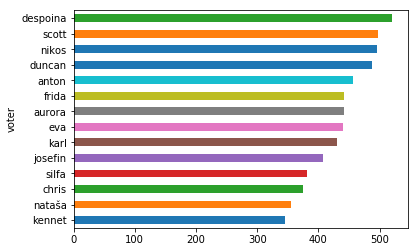

In [141]:
votes.groupby("voter").score.sum().sort_values(ascending = True).plot(kind="barh")

Despoina, Scott and Nikos were the most generous voters. The least generous were Chris, Nataša and Kennet

---
## Do people vote higher or lower for their own country?

Some people are full of patriotic spirit. Others less so. We can see who gave an above-average score to their own country by subtracting the score they gave to that country from the average vote that others gave it.

In this analysis, I had to leave out Anton, Nikos & Despoina, whose countries didn't make it to the final, and Scott & Aurora, whose country doesn't participate in Eurovision (yet). Sorry folks!

In [160]:
own_country = pd.DataFrame(columns = ["voter", "country", "own_votes", "others_votes", "difference"])
own_country.voter = votes.voter.unique()

# These are the countries of each voter
own_country.country = ["Sweden","Sweden","United Kingdom","Greece","Greece","Sweden","Canada","Russia","Sweden","Sweden","Sweden","Canada","Austria","Austria"]

for the_voter in own_country.voter.unique(): # Loop over all the voters
    
    # Grab the country they live in
    the_country = own_country[own_country.voter == the_voter].country.values[0]
    
    # If that country was in the final
    if the_country in votes.country.unique():
        
        # Calculate difference between that voter's score and the average score for each song
        diffs = []
        for country in votes.country.unique():
            ownmean = votes[(votes.voter == the_voter) & (votes.country == country)].score.mean(axis = 0)
            othermean = votes[(votes.voter != the_voter) & (votes.country == country)].score.mean(axis = 0)
            
            if (country == the_country):
                own_diff = ownmean - othermean
            else:
                diffs.append(ownmean - othermean)
        
        avg_diff = pd.Series(diffs).mean()                                                                                              

        # Put these numbers in the dataframe)
        own_country.loc[own_country.voter == the_voter, "own_votes"] = own_diff
        own_country.loc[own_country.voter == the_voter, "others_votes"] = avg_diff
        
own_country.difference = own_country.own_votes - own_country.others_votes

own_country.sort_values("difference", ascending=False).dropna()

,voter,country,own_votes,others_votes,difference
12,nataša,Austria,1.74359,-1.19026,2.93385
9,eva,Sweden,2.17949,-0.00153846,2.18103
13,silfa,Austria,0.307692,-0.759487,1.06718
2,duncan,United Kingdom,1.28205,0.709231,0.572821
8,kennet,Sweden,-1.41026,-1.22205,-0.188205
10,josefin,Sweden,-1.05128,-0.346154,-0.705128
0,chris,Sweden,-1.76923,-0.776923,-0.992308
1,karl,Sweden,-1.76923,0.0271795,-1.79641
5,frida,Sweden,-2.84615,0.228205,-3.07436


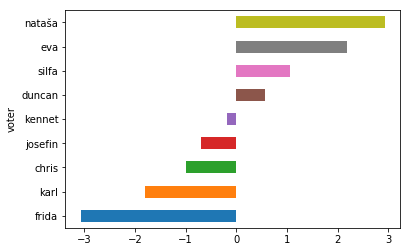

In [158]:
own_country.sort_values("difference", ascending=True).dropna().plot(kind = "barh", x = "voter", y = "difference", legend = False)

Of the people whose countries were in the final, Nataša, Eva, Silfa and Duncan ranked their country higher than others did, while Frida, Karl, Chris, Josefin and Kennet (just about) ranked their country lower than others did. What did Sweden ever do to you, Frida?

---
## Whose votes represented Europe best?

Our scores had some similarities with the final scores given by the entirety of Europe, but they also some major differences (looking at you, Finland and Cyprus). I wanted to know - who in the room was closest to the pulse of Europe's musical taste?

To figure this out, I compared everyone's country rankings with the country rankings for Europe, using [Kendall's rank correlation method](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient). This spits out a number from 1 (exact match) to -1 (total opposite).

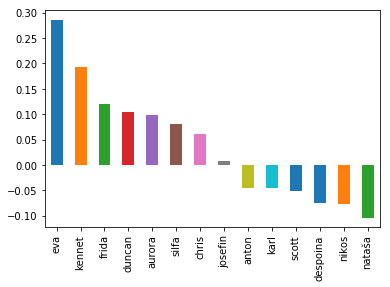

In [168]:
ranks = pd.DataFrame()
ranks["country"] = votes.country.unique()
ranks["officialpoints"] = votes.officialpoints[0:25].rank(method="min", ascending=False).astype(int)

for voter in votes.voter.unique(): # for each voter

    points_list = [] # create an empty list to hold points in

    for country in votes.country.unique(): # for each country
        points_list.append(votes[(votes.country == country) & (votes.voter == voter)].score.sum(axis = 0))
        
    ranks[voter] = pd.Series(points_list).rank(method="min", ascending=False)
    ranks[voter] = ranks[voter].astype(int)

correlations = ranks.set_index('country').corr(method = "kendall")

correlations.officialpoints[1:].sort_values(ascending=False).plot(kind="bar")

---
## Who voted similarly?

Using the same principle, we can see whose votes correlated most closely. For each voter, we can get their top three matches.

In [180]:
for voter in votes.voter.unique():
    matches = correlations.sort_values(voter, ascending=False)[voter].index[1:4]
    
    print (voter + " - " + matches[0] + ", " + matches[1] + ", " + matches[2])
    print ("")

chris - karl, aurora, frida

karl - silfa, chris, frida

duncan - silfa, eva, anton

nikos - despoina, nataša, kennet

despoina - nikos, kennet, duncan

frida - aurora, kennet, eva

scott - kennet, aurora, frida

anton - nataša, duncan, silfa

kennet - frida, scott, eva

eva - josefin, duncan, frida

josefin - eva, aurora, frida

aurora - frida, chris, josefin

nataša - anton, duncan, nikos

silfa - duncan, karl, frida



We can visualise that in a network chart.

<img src="http://www.duncangeere.com/eurovision2018/images/influence.png" width = 600>

Woah. I think it's really interesting to compare this to who sat next to each other in the room. Here's a photo from the evening that I hope Karl doesn't mind me using! (Aurora's not in it because she took the photo).

<img src="http://www.duncangeere.com/eurovision2018/images/seatingplan.jpg" width = 600>

---
## Taking it too far

There's a technique we can borrow from machine learning which looks for patterns in the data and tries to cluster voters into groups based on how similar their voting was. It's called k-means clustering, and it involves an element of randomness, so take all this next bit with a pinch of salt. Every time you run it, it gives slightly different answers.

In [184]:
from sklearn import cluster
cluster.k_means(correlations, 4)

groups = pd.DataFrame({"voter": correlations.columns, "group": cluster.k_means(correlations, 4)[1]})

for group in [0,1,2,3]:
    print("Group " + str(group + 1))
    print("=====")
    print(groups[groups["group"] == group])
    print("\n")

Group 1
=====
       voter  group
4      nikos      0
5   despoina      0
8      anton      0
13    nataša      0


Group 2
=====
     voter  group
1    chris      1
6    frida      1
7    scott      1
12  aurora      1


Group 3
=====
     voter  group
2     karl      2
3   duncan      2
14   silfa      2


Group 4
=====
             voter  group
0   officialpoints      3
9           kennet      3
10             eva      3
11         josefin      3




We can see those groups in our network chart from above. They tend to follow the lines of maximum influence (but not in all cases). Again, as this has an element of randomnness it may not match the groups calculated above.

<img src="http://www.duncangeere.com/eurovision2018/images/influence_groups.png" width = 600>

The final thing I'd like to do is look at what defines these groups, which I'm doing by comparing their average scores for each song with everyone else's average scores for each song. By doing this, we can find out the songs which defined that group's identity. These weren't the songs they voted highest or lowest, they were the ones they voted abnormally high or low compared to the rest of the group.

In [190]:
# Hardcode the groups based on the network chart above
group1 = [1, "chris", "frida", "eva", "josefin", "aurora"]
group2 = [2, "anton", "nataša"]
group3 = [3, "nikos", "despoina", "scott", "kennet", "officialpoints"]
group4 = [4, "karl", "duncan", "silfa"]

votes["group"] = None

for the_group in [group1, group2, group3, group4]:
    votes.loc[votes.voter.isin(the_group), "group"] = the_group[0]
    
# Making a dataframe
group_comps = pd.DataFrame(columns=["country", "group1", "group2", "group3", "group4"])
group_comps.country = votes.country.unique()
group_comps.set_index("country", inplace = True) 

# Assign all the scores
for country in group_comps.index:
    group_comps.loc[group_comps.index == country, "group1"] = votes[votes.country == country].groupby("group").score.mean()[1]
    group_comps.loc[group_comps.index == country, "group2"] = votes[votes.country == country].groupby("group").score.mean()[2]
    group_comps.loc[group_comps.index == country, "group3"] = votes[votes.country == country].groupby("group").score.mean()[3]
    group_comps.loc[group_comps.index == country, "group4"] = votes[votes.country == country].groupby("group").score.mean()[4]
    
# Now for each group we need to run through the countries 
# and compare their score with the average of all the others
data = []
for group in group_comps.columns:
    
    for country in group_comps.index:
        
        groupscore = group_comps.loc[country, group]
        otherscore = group_comps[group_comps.index == country].drop(group, axis=1).mean(axis=1).item()
        
        data.append([group, country, groupscore - otherscore])

group_diffs = pd.DataFrame(data, columns=["group", "country", "scorediff"])

# Print it all out              
for group in group_diffs.group.unique():
    print(group)
    print("=====")
    print("Liked: " + group_diffs[group_diffs.scorediff == group_diffs.groupby("group").scorediff.max()[group]].country.item())
    print("Disliked: " + group_diffs[group_diffs.scorediff == group_diffs.groupby("group").scorediff.min()[group]].country.item())
    print("")

group1
=====
Liked: Lithuania
Disliked: Australia

group2
=====
Liked: Albania
Disliked: Lithuania

group3
=====
Liked: Italy
Disliked: Moldova

group4
=====
Liked: Ukraine
Disliked: Portugal



There's loads more that I could dig into in this data, but I've got to stop somewhere so I'll stop here. If there's anything in particular that you'd like me to look into in the data, drop me an email at radio.edit@gmail.com.

Also, I'm a relative beginner at this kind of analysis, and it's the first time I've used some of these techniques, so if I've misrepresented something or got something plain wrong, then I'd love to hear about it. Again, drop me an email at radio.edit@gmail.com.

Finally, thanks to all my voters, to Kevin Markham at dataschool.io for amazing Pandas tutorials, to Eden for CSS tips, to Thierry Koblenz for responsive YouTube video embed code, to Silfa for being the best partner-in-party-planning anyone could ever wish for, and to the Eurovision Song Contest for delivering all these joys into my life every year.

- Duncan Geere, December 2018.
